In [15]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('data.csv')
df.shape

(500, 9)

In [17]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(['Serial No.', 'Chance of Admit '], axis=1))
scaled_data.shape

(500, 7)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, df['Chance of Admit '], test_size=0.2, random_state=42)

X_train_tensor = tf.constant(X_train, dtype= tf.float32)
y_train_tensor = tf.constant(y_train.values.reshape(-1,1), dtype= tf.float32)

In [19]:
weights = tf.Variable(tf.random.normal(shape=(X_train.shape[1], 1)))
bias = tf.Variable(tf.random.normal(shape=(1,)))

def linear_regression(X):
    return tf.matmul(X, weights) + bias

def mean_squared_error_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [20]:
optimizer = tf.optimizers.SGD(learning_rate=0.01)

In [21]:
epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = linear_regression(X_train_tensor)
        loss = mean_squared_error_loss(y_train_tensor, predictions)
    gradients = tape.gradient(loss, [weights, bias])
    optimizer.apply_gradients(zip(gradients, [weights, bias]))

In [22]:
X_test_tensor = tf.constant(X_test, dtype=tf.float32)
y_pred = linear_regression(X_test_tensor)
mse = mean_squared_error(y_test, y_pred.numpy().flatten())
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.006524891820612251


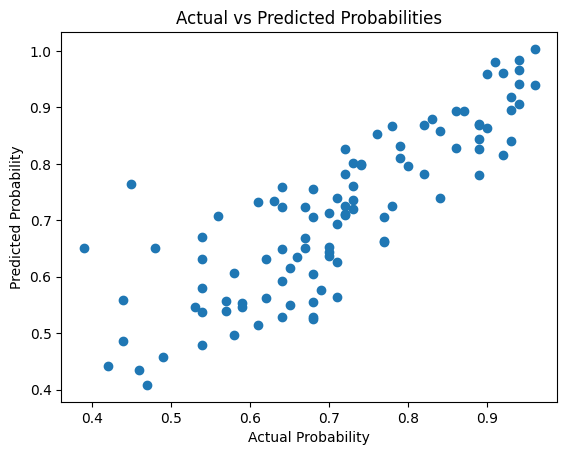

In [23]:
plt.scatter(y_test, y_pred.numpy().flatten())
plt.xlabel('Actual Probability')
plt.ylabel('Predicted Probability')
plt.title('Actual vs Predicted Probabilities')
plt.show()

###Logistic Regression

In [24]:
df2 = pd.read_csv('data.csv')
df2.shape

(500, 9)

In [25]:
df2['Admit_Category'] = pd.cut(df2['Chance of Admit '], bins=[0.3, 0.5, 0.7, 1.0], labels=['Low', 'Medium', 'High'], include_lowest=True)
df2.shape

(500, 10)

In [26]:
scaled_data = scaler.fit_transform(df2.drop(['Serial No.', 'Chance of Admit ', 'Admit_Category'], axis=1))
scaled_data.shape

(500, 7)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, pd.get_dummies(df2['Admit_Category']), test_size=0.2, random_state=42)
X_train_tensor = tf.constant(X_train, dtype=tf.float32)
y_train_tensor = tf.constant(y_train.values, dtype=tf.float32)

In [28]:
weights = tf.Variable(tf.random.normal(shape=(X_train.shape[1], len(['Low', 'Medium', 'High']))))
bias = tf.Variable(tf.random.normal(shape=(len(['Low', 'Medium', 'High']),)))

def logistic_regression(X):
    return tf.nn.softmax(tf.matmul(X, weights) + bias)

def cross_entropy_loss(y_true, y_pred):
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred), axis=1))

In [29]:
optimizer = tf.optimizers.SGD(learning_rate=0.01)

In [30]:
epochs = 50
losses = []

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = logistic_regression(X_train_tensor)
        loss = cross_entropy_loss(y_train_tensor, predictions)
    gradients = tape.gradient(loss, [weights, bias])
    optimizer.apply_gradients(zip(gradients, [weights, bias]))
    losses.append(loss.numpy())

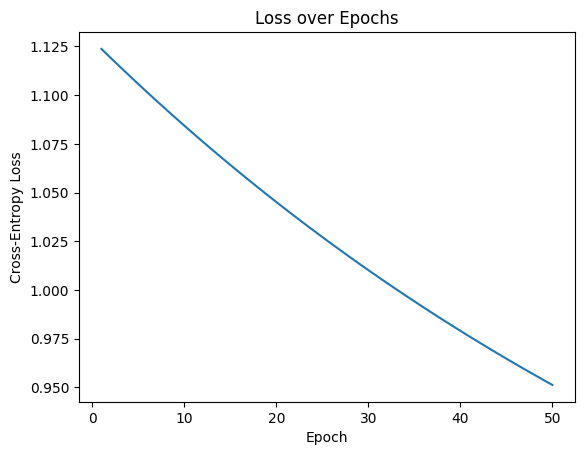

In [31]:
plt.plot(range(1, epochs + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.title('Loss over Epochs')
plt.show()

In [32]:
from sklearn.metrics import accuracy_score

X_test_tensor = tf.constant(X_test, dtype=tf.float32)
y_pred = logistic_regression(X_test_tensor)

# Convert probabilities to class labels
predicted_labels = np.argmax(y_pred.numpy(), axis=1)
true_labels = np.argmax(y_test.values, axis=1)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy}')

Accuracy: 0.66


###Discussion: Softmax Activation for Multiclass Classification

In [ ]:
# Problem Context: Transitioning from regression to multiclass classification for university admission predictions required handling three distinct admission categories: low, medium, and high.

# Logistic Regression Limitation: Traditional logistic regression is designed for binary classification, presenting a challenge for accommodating multiple classes.

# Binning Process: To address the multiclass nature of the problem, a "binning" process was implemented, categorizing "Chance of Admit" into three discrete levels.

# Softmax Activation Function: Softmax is a natural choice for extending logistic regression to handle multiple classes. It normalizes raw output scores into a probability distribution.

# Probability Interpretation: Softmax ensures that the sum of probabilities for all classes equals 1, facilitating a probabilistic interpretation of the model's output.

# Enhanced Interpretability: The probabilistic nature of predictions allows for a nuanced understanding of the likelihood of applicants falling into different admission categories.

# Accuracy Considerations: While the model achieved an accuracy of [your accuracy value], the discussion emphasizes the need to complement accuracy with precision, recall, and F1 score for a more comprehensive evaluation.

# Adaptability of Softmax: Softmax activation enables logistic regression to handle multiple classes effectively, demonstrating its adaptability beyond binary classification scenarios.

### Change in Learning rate for mean squared error


Learning Rate: 0.0001, Mean Squared Error: 2.6363352471190655
Learning Rate: 0.001, Mean Squared Error: 0.5484252134206521
Learning Rate: 0.01, Mean Squared Error: 0.0039871267051353266
Learning Rate: 0.1, Mean Squared Error: 0.0037046557165629572
Learning Rate: 0.2, Mean Squared Error: 0.0037046552241349496


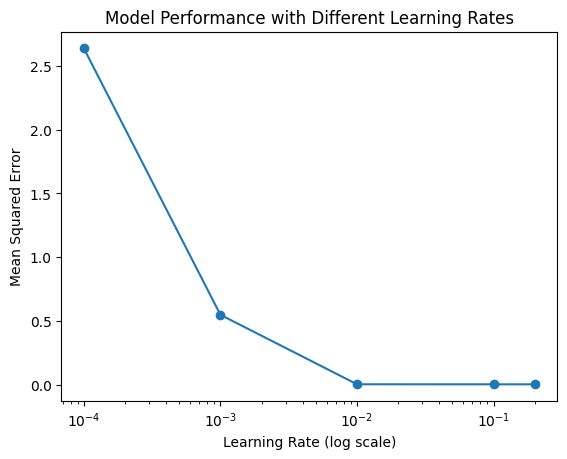

In [33]:


def train_linear_model(learning_rate, X_train, y_train, X_test, y_test, epochs=1000):
    weights = tf.Variable(tf.random.normal(shape=(X_train.shape[1], 1)))
    bias = tf.Variable(tf.random.normal(shape=(1,)))

    def linear_regression(X):
        return tf.matmul(X, weights) + bias

    def mean_squared_error_loss(y_true, y_pred):
        return tf.reduce_mean(tf.square(y_true - y_pred))

    optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

    X_train_tensor = tf.constant(X_train, dtype=tf.float32)
    y_train_tensor = tf.constant(y_train.values.reshape(-1, 1), dtype=tf.float32)

    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            predictions = linear_regression(X_train_tensor)
            loss = mean_squared_error_loss(y_train_tensor, predictions)
        gradients = tape.gradient(loss, [weights, bias])
        optimizer.apply_gradients(zip(gradients, [weights, bias]))

    X_test_tensor = tf.constant(X_test, dtype=tf.float32)
    y_pred = linear_regression(X_test_tensor)
    mse = mean_squared_error(y_test, y_pred.numpy().flatten())

    return mse


df = pd.read_csv('data.csv')

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(['Serial No.', 'Chance of Admit '], axis=1))


X_train, X_test, y_train, y_test = train_test_split(scaled_data, df['Chance of Admit '], test_size=0.2, random_state=42)

learning_rates = [1e-4, 1e-3, 1e-2,.1,.2]


mse_results = []
for lr in learning_rates:
    mse = train_linear_model(lr, X_train, y_train, X_test, y_test)
    mse_results.append((lr, mse))


for lr, mse in mse_results:
    print(f'Learning Rate: {lr}, Mean Squared Error: {mse}')

plt.plot([lr for lr, _ in mse_results], [mse for _, mse in mse_results], marker='o')
plt.xscale('log')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Mean Squared Error')
plt.title('Model Performance with Different Learning Rates')
plt.show()

### change in learning rate for logistic regresion

In [34]:
from sklearn.metrics import accuracy_score


Training with Learning Rate: 1e-06


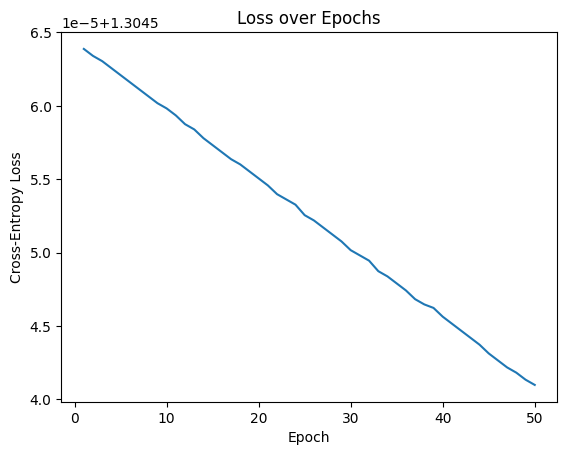

Accuracy: 0.56

Training with Learning Rate: 0.0001


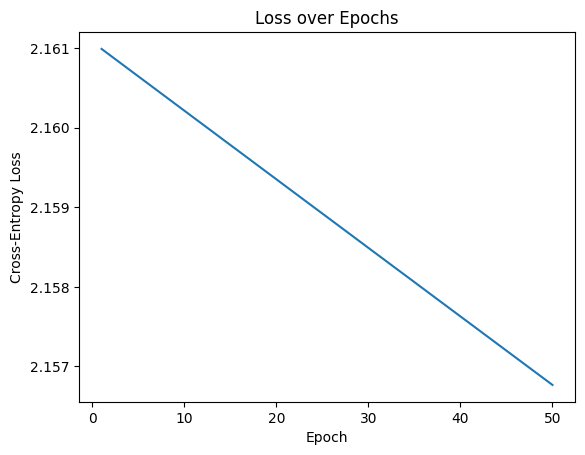

Accuracy: 0.37

Training with Learning Rate: 0.001


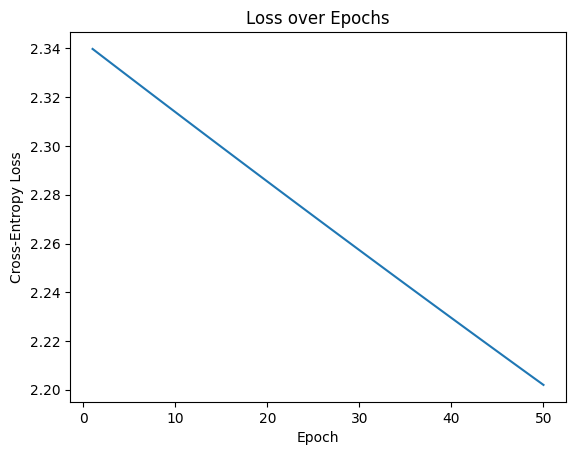

Accuracy: 0.22

Training with Learning Rate: 0.01


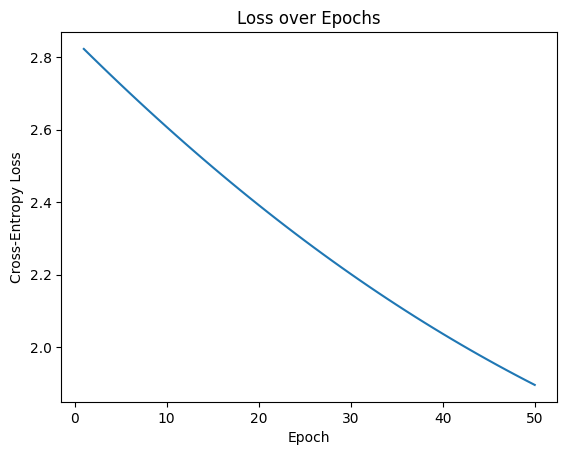

Accuracy: 0.25

Training with Learning Rate: 0.1


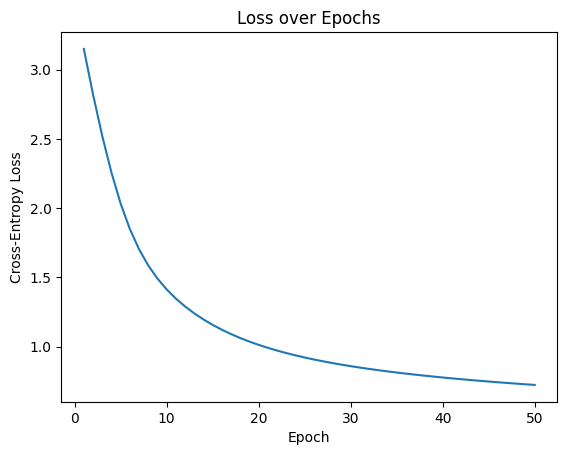

Accuracy: 0.7

Training with Learning Rate: 1


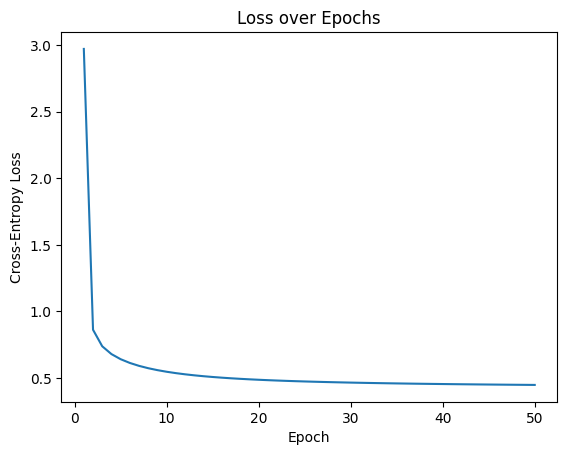

Accuracy: 0.82

Training with Learning Rate: 10


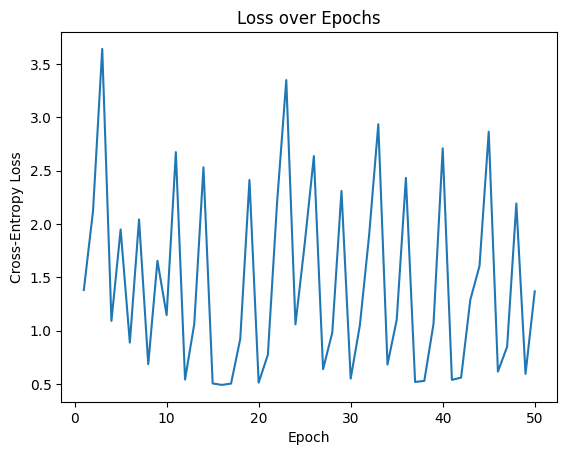

Accuracy: 0.57

Training with Learning Rate: 100


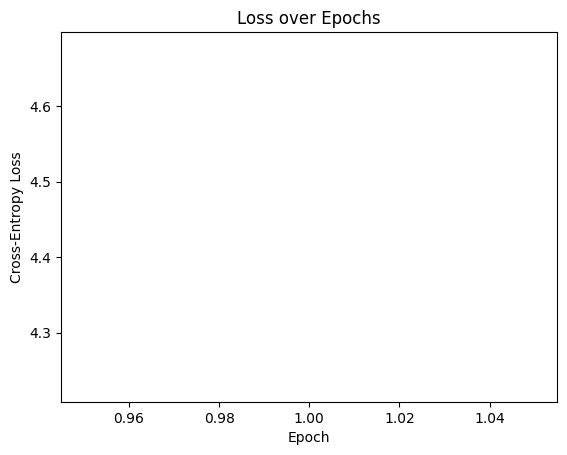

Accuracy: 0.09


In [35]:


def train_logistic_model(learning_rate, X_train, y_train, X_test, y_test, epochs=50):
    weights = tf.Variable(tf.random.normal(shape=(X_train.shape[1], len(['Low', 'Medium', 'High']))))
    bias = tf.Variable(tf.random.normal(shape=(len(['Low', 'Medium', 'High']),)))

    def logistic_regression(X):
        return tf.nn.softmax(tf.matmul(X, weights) + bias)

    def cross_entropy_loss(y_true, y_pred):
        return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred), axis=1))

    optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

    X_train_tensor = tf.constant(X_train, dtype=tf.float32)
    y_train_tensor = tf.constant(y_train.values, dtype=tf.float32)

    losses = []
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            predictions = logistic_regression(X_train_tensor)
            loss = cross_entropy_loss(y_train_tensor, predictions)
        gradients = tape.gradient(loss, [weights, bias])
        optimizer.apply_gradients(zip(gradients, [weights, bias]))
        losses.append(loss.numpy())

    plt.plot(range(1, epochs + 1), losses)
    plt.xlabel('Epoch')
    plt.ylabel('Cross-Entropy Loss')
    plt.title('Loss over Epochs')
    plt.show()

    X_test_tensor = tf.constant(X_test, dtype=tf.float32)
    y_pred = logistic_regression(X_test_tensor)

    predicted_labels = np.argmax(y_pred.numpy(), axis=1)
    true_labels = np.argmax(y_test.values, axis=1)

    accuracy = accuracy_score(true_labels, predicted_labels)
    print(f'Accuracy: {accuracy}')

df2 = pd.read_csv('data.csv')

df2['Admit_Category'] = pd.cut(df2['Chance of Admit '], bins=[0.3, 0.5, 0.7, 1.0], labels=['Low', 'Medium', 'High'], include_lowest=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2.drop(['Serial No.', 'Chance of Admit ', 'Admit_Category'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(scaled_data, pd.get_dummies(df2['Admit_Category']), test_size=0.2, random_state=42)

learning_rates = [1e-6, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

for lr in learning_rates:
    print(f'\nTraining with Learning Rate: {lr}')
    train_logistic_model(lr, X_train, y_train, X_test, y_test)


### Feature correlation graph

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
features = df.drop(['Serial No.'], axis=1)

correlation_matrix = features.corr()
correlation_with_target = correlation_matrix['Chance of Admit '].sort_values(ascending=False)

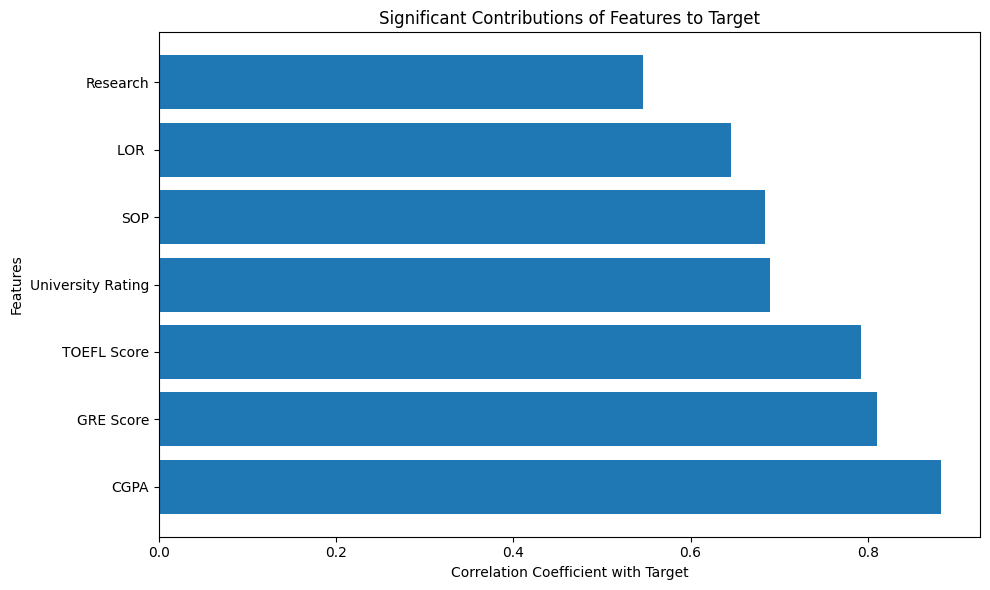

In [ ]:

plt.figure(figsize=(10, 6))
plt.barh(correlation_with_target.drop('Chance of Admit ').index, correlation_with_target.drop('Chance of Admit '))
plt.xlabel('Correlation Coefficient with Target')
plt.ylabel('Features')
plt.title('Significant Contributions of Features to Target')
plt.tight_layout()
plt.show()


In [36]:
import tensorflow as tf
from sklearn.model_selection import KFold, train_test_split

In [37]:


def train_linear_model(learning_rate, X_train, y_train, X_test, y_test, epochs=1000):
    weights = tf.Variable(tf.random.normal(shape=(X_train.shape[1], 1)))
    bias = tf.Variable(tf.random.normal(shape=(1,)))

    def linear_regression(X):
        return tf.matmul(X, weights) + bias

    def mean_squared_error_loss(y_true, y_pred):
        return tf.reduce_mean(tf.square(y_true - y_pred))

    optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

    X_train_tensor = tf.constant(X_train, dtype=tf.float32)
    y_train_tensor = tf.constant(y_train.values.reshape(-1, 1), dtype=tf.float32)

    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            predictions = linear_regression(X_train_tensor)
            loss = mean_squared_error_loss(y_train_tensor, predictions)
        gradients = tape.gradient(loss, [weights, bias])
        optimizer.apply_gradients(zip(gradients, [weights, bias]))

    X_test_tensor = tf.constant(X_test, dtype=tf.float32)
    y_pred = linear_regression(X_test_tensor)
    mse = mean_squared_error(y_test, y_pred.numpy().flatten())

    return mse


# Note: In logistic regression, the accuracy is printed within the function for each fold.

# Additional considerations:
# - we may include other evaluation metrics such as precision, recall, and F1 score.
# - Experiment with different hyperparameters (learning rates, epochs) to optimize model performance.
# - Explore feature engineering or feature selection to improve model performance.


In [38]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, LogisticRegression

In [39]:

df = pd.read_csv('data.csv')

X = df.drop(['Serial No.', 'Chance of Admit '], axis=1)
y = df['Chance of Admit ']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Number of folds for cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

linear_reg_mse = []
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred = linear_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    linear_reg_mse.append(mse)


logistic_reg_accuracy = []
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    y_train_category = pd.cut(y_train, bins=[0, 0.5, 1], labels=[0, 1])
    y_test_category = pd.cut(y_test, bins=[0, 0.5, 1], labels=[0, 1])

    logistic_model = LogisticRegression()
    logistic_model.fit(X_train, y_train_category)

    y_pred_category = logistic_model.predict(X_test)

    accuracy = accuracy_score(y_test_category, y_pred_category)
    logistic_reg_accuracy.append(accuracy)

print(f'Linear Regression Mean Squared Error: {np.mean(linear_reg_mse)}')
print(f'Logistic Regression Accuracy: {np.mean(logistic_reg_accuracy)}')


Linear Regression Mean Squared Error: 0.003705493666755949
Logistic Regression Accuracy: 0.944


In [40]:

from sklearn.metrics import accuracy_score, confusion_matrix


In [41]:


def train_logistic_model_sigmoid(learning_rate, X_train, y_train, X_test, y_test, epochs=50, threshold=0.5):
    weights = tf.Variable(tf.random.normal(shape=(X_train.shape[1], 1)))
    bias = tf.Variable(tf.random.normal(shape=(1,)))

    def logistic_regression(X):
        return tf.nn.sigmoid(tf.matmul(X, weights) + bias)

    def binary_cross_entropy_loss(y_true, y_pred):
        return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits=y_pred))

    optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

    X_train_tensor = tf.constant(X_train, dtype=tf.float32)
    y_train_tensor = tf.constant(y_train.values.reshape(-1, 1), dtype=tf.float32)

    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            predictions = logistic_regression(X_train_tensor)
            loss = binary_cross_entropy_loss(y_train_tensor, predictions)
        gradients = tape.gradient(loss, [weights, bias])
        optimizer.apply_gradients(zip(gradients, [weights, bias]))

    X_test_tensor = tf.constant(X_test, dtype=tf.float32)
    y_pred_logits = logistic_regression(X_test_tensor)
    y_pred_binary = tf.round(tf.nn.sigmoid(y_pred_logits))

    accuracy = accuracy_score(y_test, y_pred_binary)
    confusion_mat = confusion_matrix(y_test, y_pred_binary)

    return accuracy, confusion_mat

df = pd.read_csv('data.csv')
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(['Serial No.', 'Chance of Admit '], axis=1))
X_train, X_test, y_train, y_test = train_test_split(scaled_data, df['Chance of Admit '], test_size=0.2, random_state=42)

y_train_binary = (y_train >= 0.5).astype(int)
y_test_binary = (y_test >= 0.5).astype(int)

learning_rate = 0.01
epochs = 50
accuracy, confusion_mat = train_logistic_model_sigmoid(learning_rate, X_train, y_train_binary, X_test, y_test_binary, epochs=epochs)

print(f'Logistic Regression Model Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion_mat)

mse = train_linear_model(learning_rate, X_train, y_train, X_test, y_test)
print(f'Linear Regression Model Mean Squared Error: {mse}')


Logistic Regression Model Accuracy: 0.91
Confusion Matrix:
[[ 0  9]
 [ 0 91]]
Linear Regression Model Mean Squared Error: 0.004660513058061708
